# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Install

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

<AxesSubplot:xlabel='class', ylabel='count'>

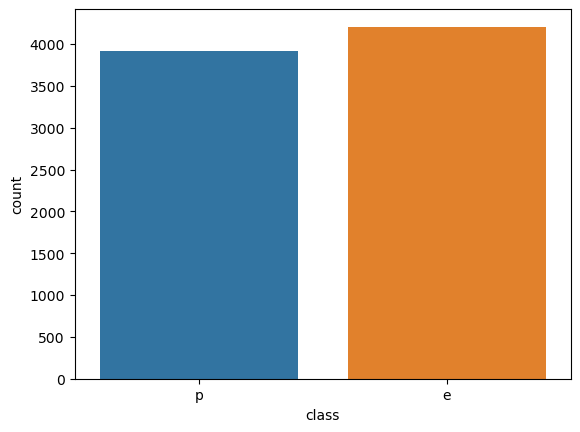

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


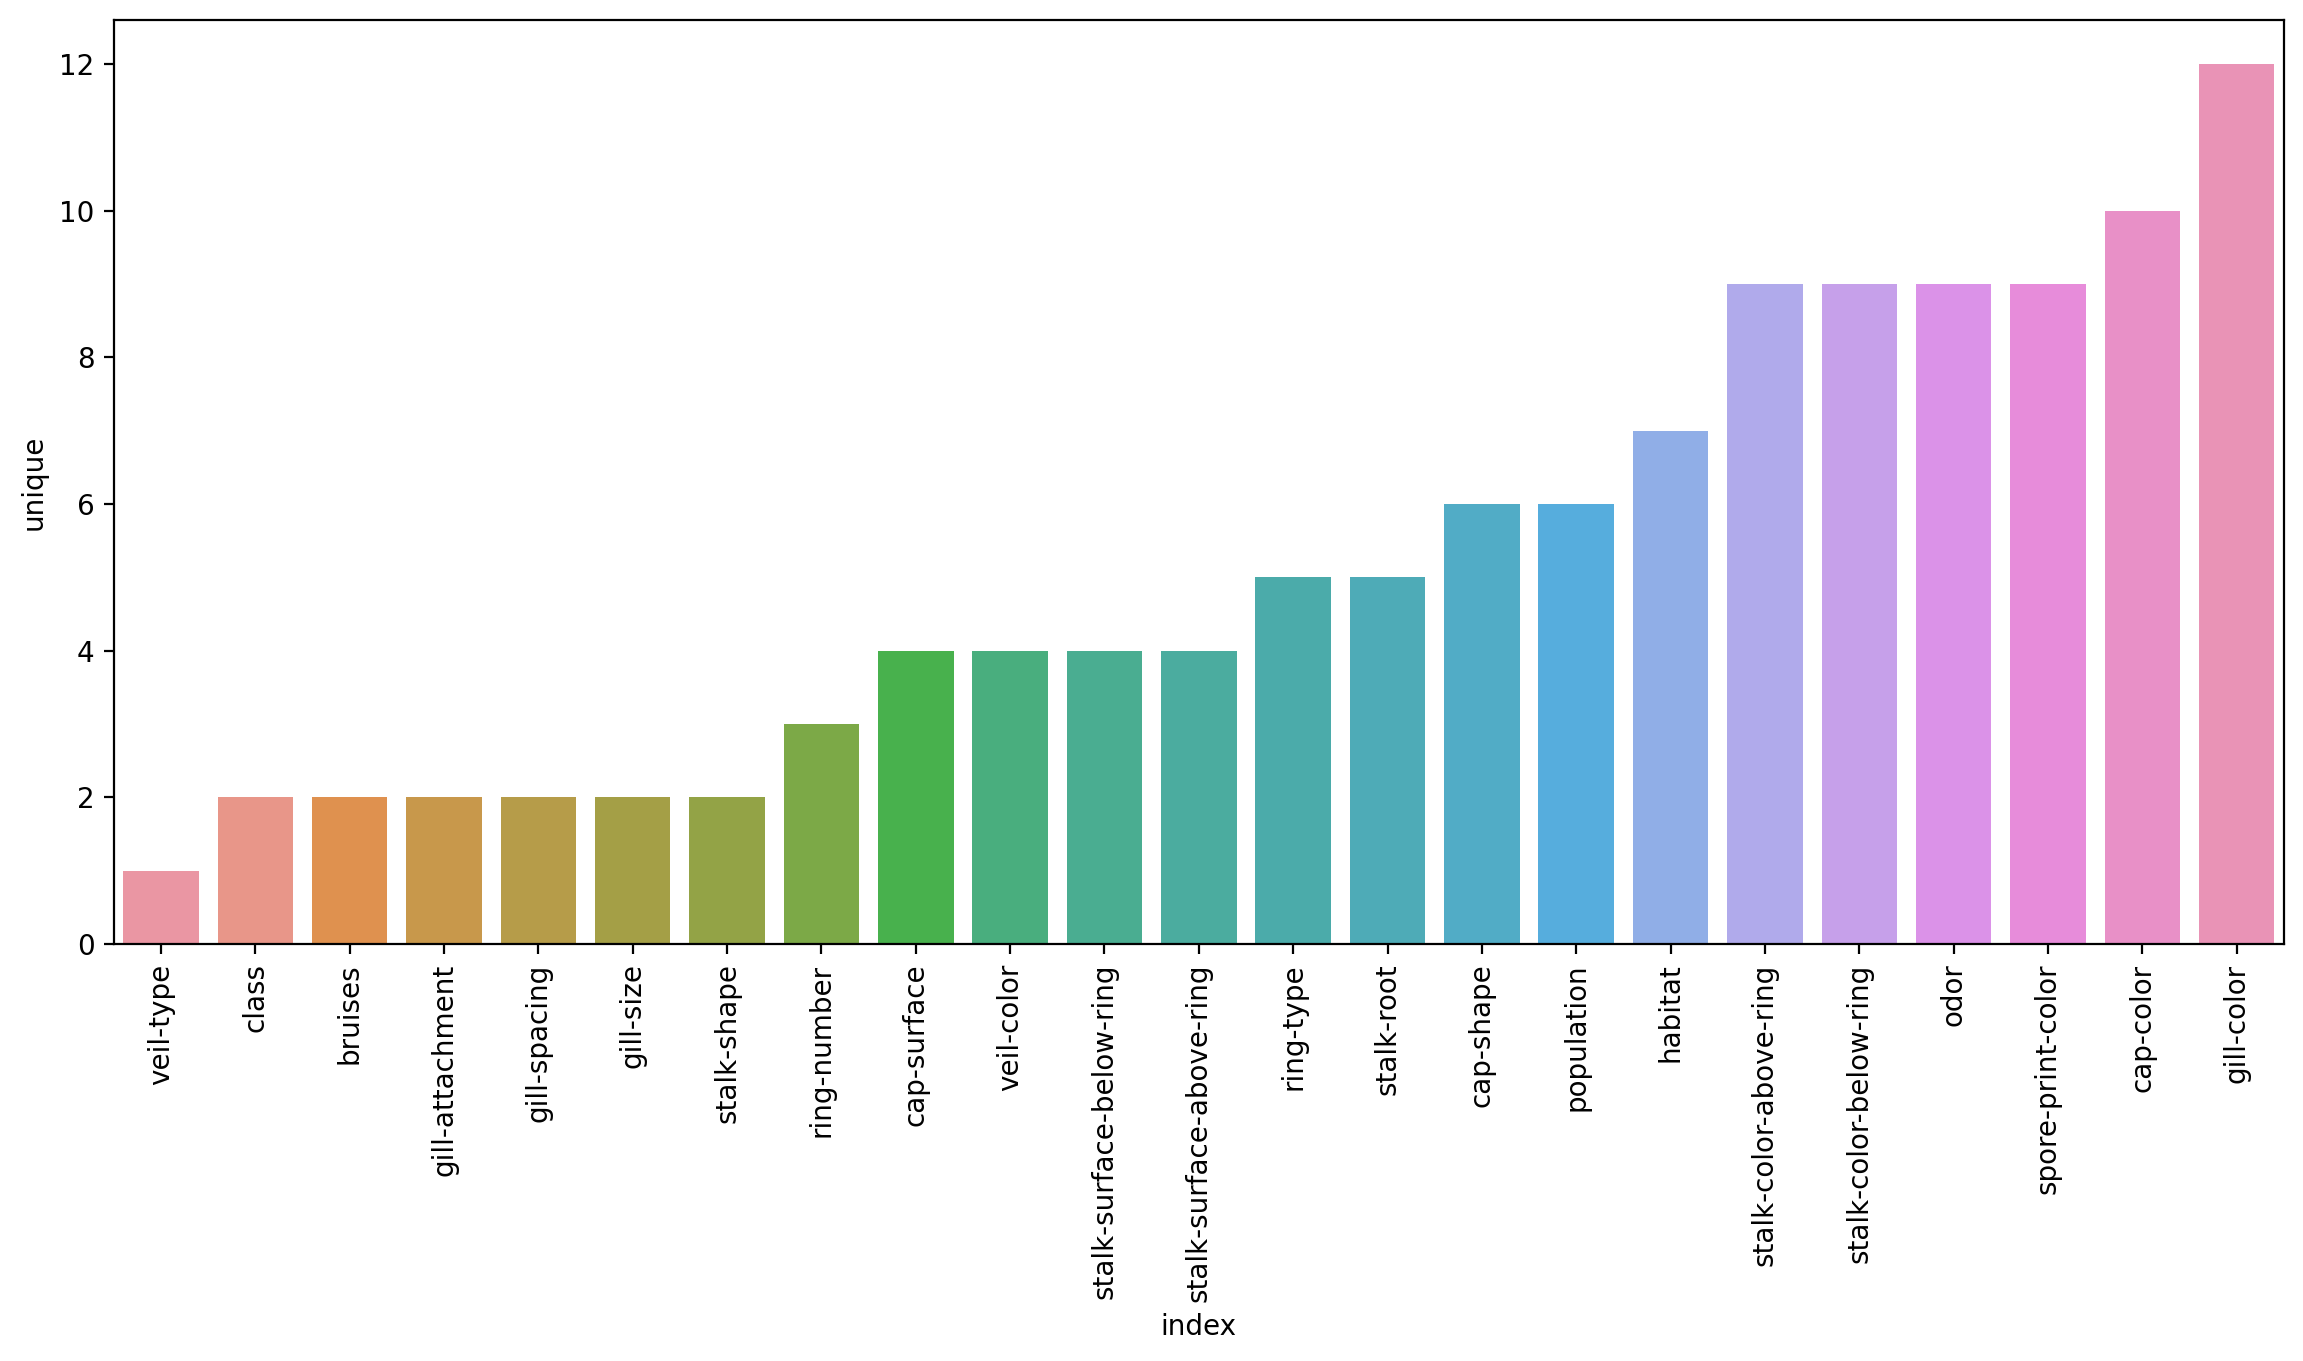

In [8]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

# Train Test Split

In [9]:
X=df.drop('class',axis=1)


In [10]:
X=pd.get_dummies(X,drop_first=True)

In [11]:
y=df['class']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.15,random_state=101)

# Modeling

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
model=AdaBoostClassifier(n_estimators=1)

In [17]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

# Evaluation

In [19]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [20]:
predictions=model.predict(X_test)

In [21]:
predictions

array(['p', 'p', 'p', ..., 'p', 'e', 'p'], dtype=object)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.97      0.81      0.88      3553
           p       0.83      0.97      0.89      3352

    accuracy                           0.89      6905
   macro avg       0.90      0.89      0.89      6905
weighted avg       0.90      0.89      0.89      6905



In [24]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
model.feature_importances_.argmax()

22

In [26]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

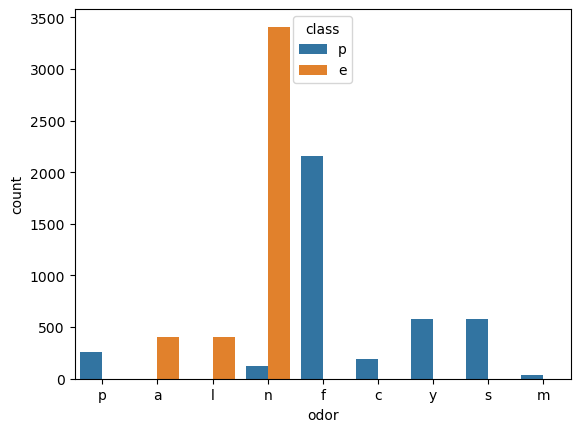

In [27]:
sns.countplot(data=df,x='odor',hue='class')

# Analyzing performance as more weak learners are needed

In [28]:
len(X.columns)

95

In [30]:
error_rates=[]
for n in range(1,96):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    err=1- accuracy_score(y_test,preds)
    error_rates.append(err)

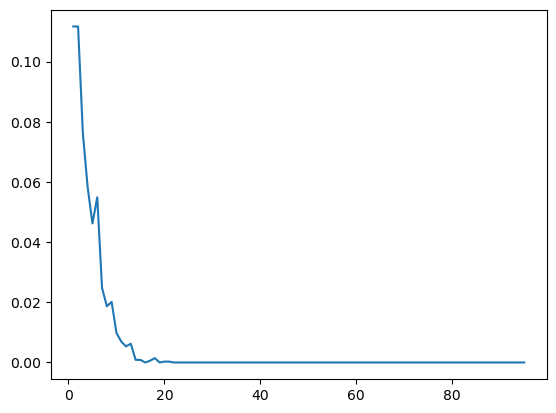

In [31]:
plt.plot(range(1,96),error_rates)

In [32]:
model

AdaBoostClassifier(n_estimators=95)

In [33]:
model.feature_importances_

array([0.        , 0.01052632, 0.02105263, 0.        , 0.01052632,
       0.        , 0.        , 0.01052632, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.01052632, 0.02105263, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.10526316, 0.08421053, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.02105263, 0.        , 0.        , 0.01052632, 0.01052632,
       0.02105263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07368421, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02105263, 0.01052632, 0.        , 0.     

In [34]:
feats=pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [35]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.010526
cap-shape_k,0.021053
cap-shape_s,0.000000
cap-shape_x,0.010526
...,...
habitat_l,0.010526
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [36]:
imp_feats=feats[feats['Importance']>0]

In [37]:
imp_feats

,Importance
cap-shape_f,0.010526
cap-shape_k,0.021053
cap-shape_x,0.010526
cap-surface_y,0.010526
cap-color_w,0.031579
cap-color_y,0.010526
bruises_t,0.021053
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158


In [38]:
imp_feats=imp_feats.sort_values('Importance')

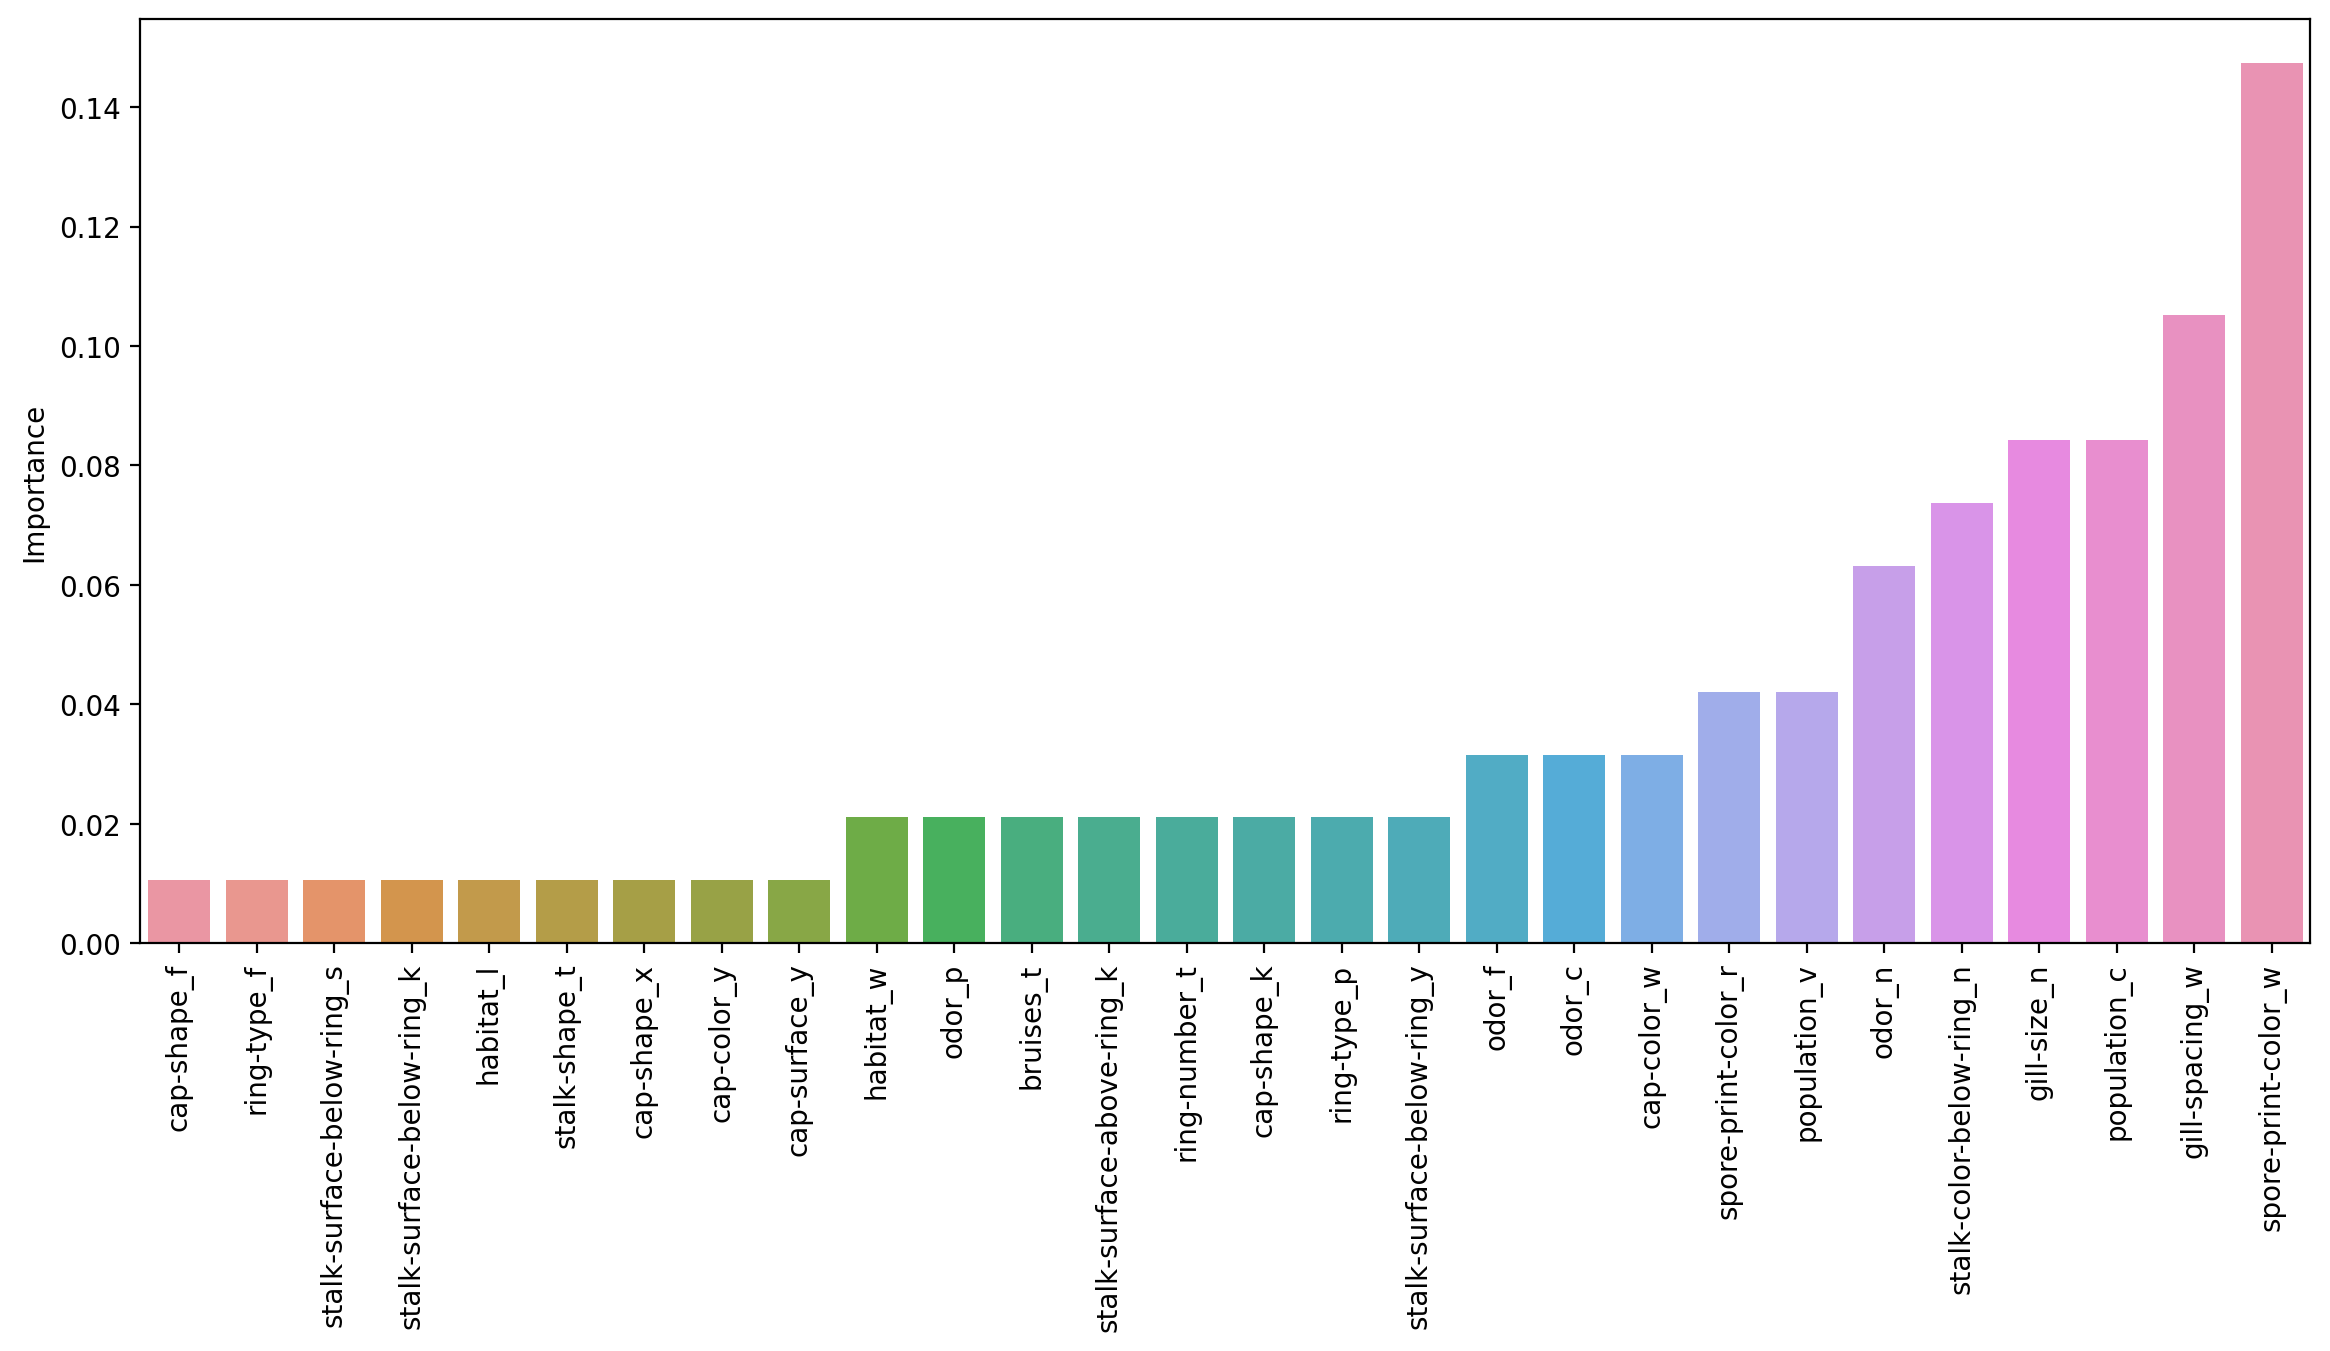

In [40]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='habitat', ylabel='count'>

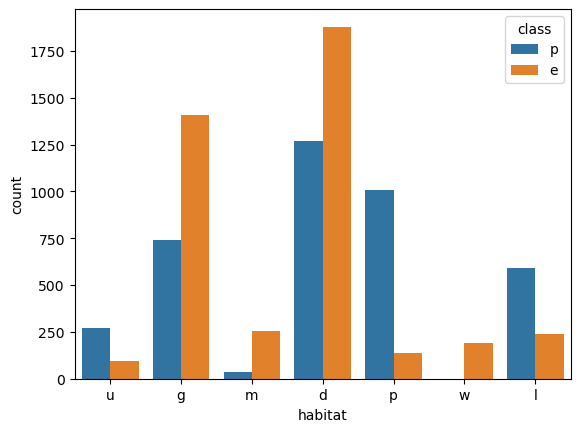

In [41]:
sns.countplot(data=df,x='habitat',hue='class')